In [1]:
from examples.seismic import Receiver, Model

from examples.seismic.acoustic import acoustic_setup
from examples.seismic.vector_reflectivity import vector_reflectivity_setup
from examples.seismic.variable_density import variable_density_setup

import numpy as np

from devito import norm, configuration, VectorTimeFunction, TimeFunction

import matplotlib.pyplot as plt

configuration['ignore-unknowns'] = 1

mpi4py is not available. You must install it


In [2]:
nx = 200
nz = 120

shape = (nx, nz)

In [ ]:
tn = 500.  # Final time

presets = {
    'layers-elastic': {'preset': 'layers-elastic', 'nlayers': 2},
    'layers-isotropic': {'preset': 'layers-isotropic', 'nlayers': 1},
}
# Create solver from preset
solver = acoustic_setup(shape=(20, 25), spacing=[15. for _ in shape],
                        nbl=10, tn=tn, space_order=2, time_order=1,
                        **(presets['layers-isotropic']), dtype=np.float64)

# Create adjoint receiver symbol
srca = Receiver(name='srca', grid=solver.model.grid,
                time_range=solver.geometry.time_axis,
                coordinates=solver.geometry.src_positions)

# Run forward and adjoint operators
rec = solver.forward(save=False)[0]
solver.adjoint(rec=rec, srca=srca)

# Adjoint test: Verify <Ax,y> matches  <x, A^Ty> closely
term1 = np.dot(srca.data.reshape(-1), solver.geometry.src.data)
term2 = norm(rec) ** 2
print('<x, A*y>: %f, <Ax,y>: %f, difference: %4.4e, ratio: %f'
    % (term1, term2, (term1 - term2)/term1, term1/term2))


assert np.isclose((term1 - term2)/term1, 0., atol=1.e-11)

Operator `initdamp` ran in 0.01 s
Operator `Forward` ran in 0.01 s
No source type defined, returning uninitiallized (zero) source
Operator `Adjoint` ran in 0.01 s


<x, A*y>: 105311.127206, <Ax,y>: 105311.127206, difference: 0.0000e+00, ratio: 1.000000


/tmp/ipykernel_124395/1625754018.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('<x, A*y>: %f, <Ax,y>: %f, difference: %4.4e, ratio: %f'


In [ ]:
solver.model.r

Vector(Derivative(0.5*vp(x, y), x)/vp(x, y), Derivative(0.5*vp(x, y), y)/vp(x, y))

In [ ]:
tn = 500.  # Final time

presets = {
    'layers-elastic': {'preset': 'layers-elastic', 'nlayers': 2},
    'layers-isotropic': {'preset': 'layers-isotropic', 'nlayers': 1},
}
solver = vector_reflectivity_setup(shape=(20, 25), spacing=[15. for _ in shape],
                        nbl=10, tn=tn, space_order=2, time_order=1,
                        **(presets['layers-isotropic']), dtype=np.float64, f0=0.010)#, density=True)

# Create adjoint receiver symbol
srca = Receiver(name='srca', grid=solver.model.grid,
                time_range=solver.geometry.time_axis,
                coordinates=solver.geometry.src_positions)

# Run forward and adjoint operators
rec = solver.forward(save=False)[0]
solver.adjoint(rec=rec, srca=srca)

# Adjoint test: Verify <Ax,y> matches  <x, A^Ty> closely
term1 = np.dot(srca.data.reshape(-1), solver.geometry.src.data)
term2 = norm(rec) ** 2
print('<x, A*y>: %f, <Ax,y>: %f, difference: %4.4e, ratio: %f'
    % (term1, term2, (term1 - term2)/term1, term1/term2))


assert np.isclose((term1 - term2)/term1, 0., atol=1.e-11)

Operator `initdamp` ran in 0.01 s
Operator `Forward` ran in 0.01 s
No source type defined, returning uninitiallized (zero) source
Operator `Adjoint` ran in 0.01 s


<x, A*y>: 105311.127206, <Ax,y>: 105311.127206, difference: 1.3818e-16, ratio: 1.000000


/tmp/ipykernel_124395/1187217452.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('<x, A*y>: %f, <Ax,y>: %f, difference: %4.4e, ratio: %f'


In [ ]:
tn = 500.  # Final time

presets = {
    'layers-elastic': {'preset': 'layers-elastic', 'nlayers': 2},
    'layers-isotropic': {'preset': 'layers-isotropic', 'nlayers': 1},
}
solver = variable_density_setup(shape=(20, 25), spacing=[15. for _ in shape],
                        nbl=10, tn=tn, space_order=2, time_order=1,
                        **(presets['layers-isotropic']), dtype=np.float64, f0=0.010, density=True)

# Create adjoint receiver symbol
srca = Receiver(name='srca', grid=solver.model.grid,
                time_range=solver.geometry.time_axis,
                coordinates=solver.geometry.src_positions)

# Run forward and adjoint operators
rec = solver.forward(save=False)[0]
solver.adjoint(rec=rec, srca=srca)

# Adjoint test: Verify <Ax,y> matches  <x, A^Ty> closely
term1 = np.dot(srca.data.reshape(-1), solver.geometry.src.data)
term2 = norm(rec) ** 2
print('<x, A*y>: %f, <Ax,y>: %f, difference: %4.4e, ratio: %f'
    % (term1, term2, (term1 - term2)/term1, term1/term2))


assert np.isclose((term1 - term2)/term1, 0., atol=1.e-11)

Operator `initdamp` ran in 0.01 s
Operator `Forward` ran in 0.01 s
No source type defined, returning uninitiallized (zero) source
Operator `Adjoint` ran in 0.01 s
/tmp/ipykernel_214599/954367938.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('<x, A*y>: %f, <Ax,y>: %f, difference: %4.4e, ratio: %f'


<x, A*y>: 93520.648318, <Ax,y>: 100882.699722, difference: -7.8721e-02, ratio: 0.927024


AssertionError: 

### Wavefield record

In [ ]:
tn = 500.  # Final time

presets = {
    'layers-isotropic': {'preset': 'layers-isotropic', 'nlayers': 2},
}

solver = vector_reflectivity_setup(shape=(20, 25), spacing=[15. for _ in shape],
                        nbl=10, tn=tn, space_order=4, time_order=1,
                        **(presets['layers-isotropic']), dtype=np.float64)#, density=True)
# solver = acoustic_setup(shape=(20, 25), spacing=[15. for _ in shape],
#                         nbl=10, tn=tn, space_order=4, time_order=1,
#                         **(presets['layers-isotropic']), dtype=np.float64, density=True)

# # Create adjoint receiver symbol
# srca = Receiver(name='srca', grid=solver.model.grid,
#                 time_range=solver.geometry.time_axis,
#                 coordinates=solver.geometry.src_positions)

# u = TimeFunction(name='u', space_order=solver.model.space_order, grid=solver.model.grid, time_order=2, save=solver.geometry.nt)

# Run forward and adjoint operators
rec, u, _ = solver.forward(save=True)
v = solver.adjoint(save=True, rec=rec)[1]
# solver.adjoint(rec=rec, srca=srca)

nbl = 10
solver.geometry.nt, u.data[:, nbl:-nbl, nbl:-nbl].shape

Operator `initdamp` ran in 0.01 s
Operator `Forward` ran in 0.01 s
No source type defined, returning uninitiallized (zero) source
No source type defined, returning uninitiallized (zero) source
Operator `Adjoint` ran in 0.01 s


(212, (212, 20, 25))

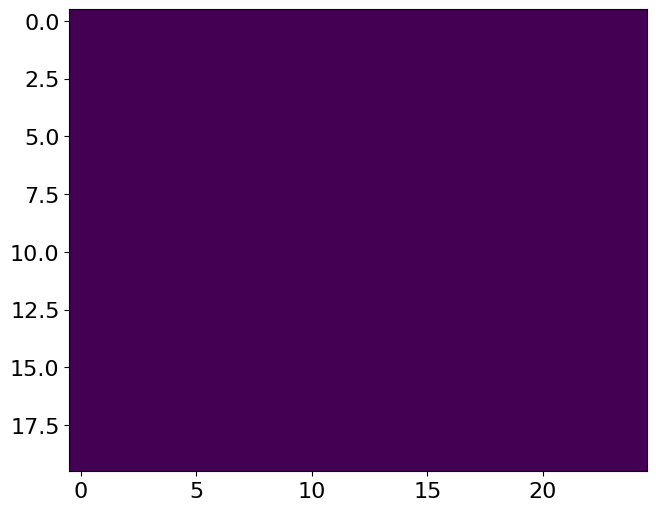

In [ ]:
# for i in range(solver.geometry.nt):
plt.imshow(u.data[0, nbl:-nbl, nbl:-nbl])

In [ ]:
u.data[:, nbl:-nbl, nbl:-nbl].tofile('vr-forward.bin')
v.data[:, nbl:-nbl, nbl:-nbl].tofile('vr-adjoint.bin')

In [ ]:
v.data[:,:,:]

Data([[[ -1.74638323,  -3.49111168,  -4.91335433, ...,  -0.71105501,
         -0.52439868,  -0.27084729],
       [ -3.53160094,  -6.98011224,  -9.66414225, ...,  -1.38228644,
         -1.00719063,  -0.51941015],
       [ -5.08887018,  -9.89694037, -13.38441904, ...,  -1.93478617,
         -1.35668999,  -0.69112817],
       ...,
       [ -5.08887018,  -9.89694037, -13.38441904, ...,  -1.93478617,
         -1.35668999,  -0.69112817],
       [ -3.53160094,  -6.98011224,  -9.66414225, ...,  -1.38228644,
         -1.00719063,  -0.51941015],
       [ -1.74638323,  -3.49111168,  -4.91335433, ...,  -0.71105501,
         -0.52439868,  -0.27084729]],

      [[ -1.75617251,  -3.52584692,  -4.99424853, ...,  -0.72606491,
         -0.5364613 ,  -0.27693585],
       [ -3.56513023,  -7.07131834,  -9.84173988, ...,  -1.40442028,
         -1.02903225,  -0.53144615],
       [ -5.16624177, -10.07044472, -13.66438209, ...,  -1.94282455,
         -1.37869831,  -0.70603701],
       ...,
       [ -5.16624177